In [311]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [312]:
import pytesseract
TESSERACT_LINK = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = TESSERACT_LINK

In [313]:
link_mucluc = r"D:\Product\text_summarizer\datasets\data_image\TTX-Khung CPDT_V01_20180910\TTX-Khung CPDT_V01_20180910_page_1.png"
# Load ảnh
image_1 = cv2.imread(link_mucluc)
image_2 = cv2.imread(link_mucluc)
print(image_1.shape)
print(image_2.shape)

(2339, 1654, 3)
(2339, 1654, 3)


In [314]:
# Chuyển ảnh sang ảnh grayscale
gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

# Sử dụng MSER để phát hiện vùng chữ
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray)

# Lọc các vùng quá nhỏ
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
hulls = [h for h in hulls if cv2.contourArea(h) > 100]

# Sắp xếp các vùng theo thứ tự từ trên xuống dưới
hulls.sort(key=lambda x: cv2.boundingRect(x)[1])

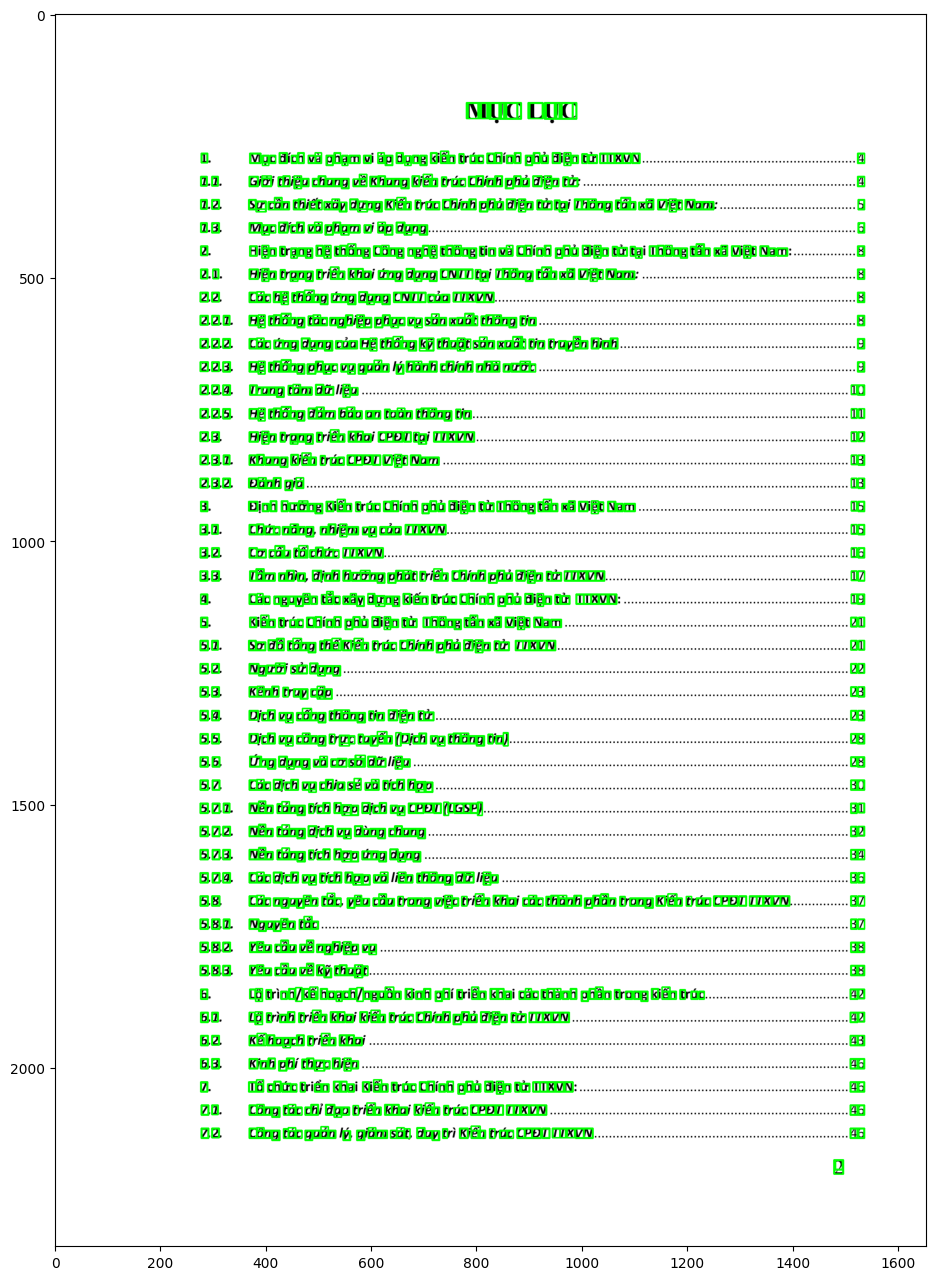

In [315]:
image_copy = image_1.copy()
# Vẽ hình chữ nhật quanh các vùng chữ
for hull in hulls:
    x, y, w, h = cv2.boundingRect(hull)
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Lưu ảnh có vùng chữ được vẽ
# cv2.imwrite(r'D:\Product\text_summarizer\datasets\data_test\output.jpg', image_1)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_copy)

In [316]:
# Chia ảnh thành các dòng chữ
lines = []
line = []
for hull in hulls:
    x, y, w, h = cv2.boundingRect(hull)
    if line and y - line[-1][1] > h * 1.2:  # Nếu khoảng cách lớn hơn 1.2 lần chiều cao
        lines.append(line)
        line = []
    line.append((x, y, x + w, y + h))
if line:
    lines.append(line)

In [317]:
# Tính toán khoảng cách trung bình giữa các dòng chữ
avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

# Tính toán padding
line_margin = int((avg_line_spacing / 8))
print("margin = ", line_margin)
# Lấy kích thước ảnh
height, width = image_1.shape[:2]
print("height, width = ", height, width)


margin =  -2
height, width =  2339 1654


In [318]:
lines_rects = []
for line in lines:
    # Tính toán margin trái phải
    # left_margin = min(rect[0] for rect in line)
    # right_margin = width - max(rect[2] for rect in line)
    # horizontal_margin = int(min(left_margin, right_margin) / 2)

    # x_min = min(rect[0] for rect in line) - horizontal_margin
    x_min = min(rect[0] for rect in line) + line_margin
    y_min = min(rect[1] for rect in line) + line_margin
    # x_max = max(rect[2] for rect in line) + horizontal_margin
    x_max = max(rect[2] for rect in line) - line_margin
    y_max = max(rect[3] for rect in line) - line_margin
    lines_rects.append((x_min, y_min, x_max, y_max))
    # Vẽ hình chữ nhật lớn xung quanh tất cả các hình chữ nhật con
    cv2.rectangle(image_2, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

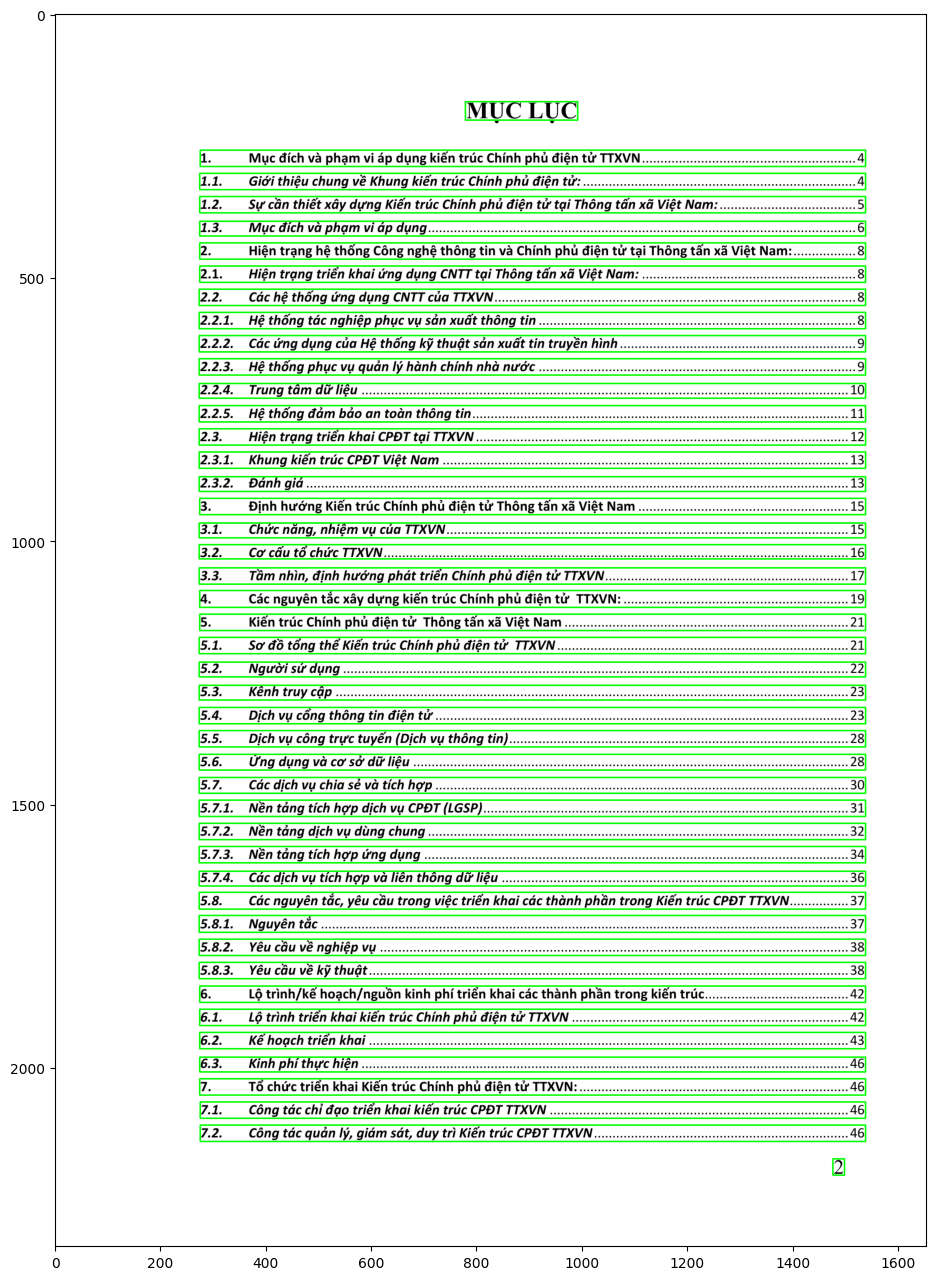

In [319]:

# Lưu ảnh có vùng chữ được vẽ

cv2.imwrite(r"D:\Product\text_summarizer\datasets\data_test\output2.jpg", image_2)

plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_2)

In [320]:
# Đảm bảo rằng thư mục lưu trữ ảnh đã được tạo
import os

output_dir = 'output_images/TTX_Khung_CPDT_V01_20180910'
os.makedirs(output_dir, exist_ok=True)

In [321]:
def crop_box(image, box_coordinates):
    """
    Cắt ảnh theo tọa độ hình chữ nhật đã cho.

    Args:
        image (numpy.ndarray): Ảnh nguồn.
        box_coordinates (tuple): Tọa độ hình chữ nhật (x_min, y_min, x_max, y_max).

    Returns:
        numpy.ndarray: Ảnh đã được cắt theo tọa độ hình chữ nhật.
    """
    x_min, y_min, x_max, y_max = box_coordinates
    return image[y_min:y_max, x_min:x_max]

In [322]:
print(lines)

[[(781, 168, 821, 198), (781, 168, 821, 198), (781, 168, 821, 198), (781, 168, 821, 198), (780, 168, 821, 198), (780, 168, 821, 198), (780, 168, 821, 198), (780, 168, 822, 198), (823, 168, 853, 199), (823, 168, 853, 199), (823, 168, 853, 199), (823, 168, 853, 199), (823, 168, 854, 199), (823, 168, 854, 199), (823, 168, 854, 199), (856, 168, 876, 198), (856, 168, 877, 198), (856, 168, 883, 198), (856, 168, 883, 198), (856, 168, 883, 198), (856, 168, 883, 198), (856, 168, 883, 199), (856, 168, 883, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (898, 168, 925, 198), (898, 168, 925, 198), (897, 168, 925, 198), (897, 168, 925, 198), (897, 168, 925, 198), (928, 16

In [323]:
# # Xử lý từng dòng chữ và lưu ảnh vào tệp tin
# for i, line in enumerate(lines):
#     # Cắt ảnh theo dòng chữ
#     roi = image_2[min(rect[1] for rect in line):max(rect[3] for rect in line),
#                 min(rect[0] for rect in line):max(rect[2] for rect in line)]
#     # Đặt tên cho tệp tin ảnh
#     filename = os.path.join(output_dir, f'line_{i}.jpg')
    
#     # Lưu ảnh vào tệp tin
#     cv2.imwrite(filename, roi)

In [324]:
# Xử lý từng dòng chữ và lưu ảnh vào tệp tin
for i, line in enumerate(lines_rects):
    roi = crop_box(image_1, line)
    # Đặt tên cho tệp tin ảnh
    filename = os.path.join(output_dir, f'line_{i}.jpg')
    
    # Lưu ảnh vào tệp tin
    cv2.imwrite(filename, roi)

In [325]:
def detect_text_area(image):
    if len(image.shape) == 3:
        # Nếu ảnh không phải là ảnh grayscale, chuyển đổi sang ảnh grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        # Nếu ảnh đã là ảnh grayscale, sử dụng ảnh đó trực tiếp
        gray = image.copy()
    # Sử dụng MSER để phát hiện vùng chữ
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(gray)

    # Lọc các vùng quá nhỏ
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    hulls = [h for h in hulls if cv2.contourArea(h) > 100]
    # Sắp xếp các vùng theo thứ tự từ trên xuống dưới
    hulls.sort(key=lambda x: cv2.boundingRect(x)[1])

    return hulls

In [326]:
def detect_line_word(image):
    hulls = detect_text_area(image)
    # Chia ảnh thành các dòng chữ
    lines = []
    current_line = []
    for hull in hulls:
        x, y, w, h = cv2.boundingRect(hull)
        if (
            current_line and y - current_line[-1][1] > h * 1.2
        ):  # Khoảng cách lớn hơn 1.2 lần chiều cao
            lines.append(current_line)
            current_line = []
        current_line.append((x, y, x + w, y + h))
    if current_line:
        lines.append(current_line)

    # Tính toán khoảng cách trung bình giữa các dòng chữ
    avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

    # Tính toán margin
    line_margin = int((avg_line_spacing / 8))
    # Lấy kích thước ảnh
    # height, width = image.shape[:2]

    # Tạo hình chữ nhật lớn nhất chứa các dòng chữ
    lines_rects = []
    for line in lines:
        # Tính toán margin trái phải
        # left_margin = min(rect[0] for rect in line)
        # right_margin = width - max(rect[2] for rect in line)
        # horizontal_margin = int(min(left_margin, right_margin) / 2)

        # x_min = min(rect[0] for rect in line) - horizontal_margin
        x_min = min(rect[0] for rect in line) + line_margin
        y_min = min(rect[1] for rect in line) + line_margin
        # x_max = max(rect[2] for rect in line) + horizontal_margin
        x_max = max(rect[2] for rect in line) - line_margin
        y_max = max(rect[3] for rect in line) - line_margin
        lines_rects.append((x_min, y_min, x_max, y_max))
    return lines_rects

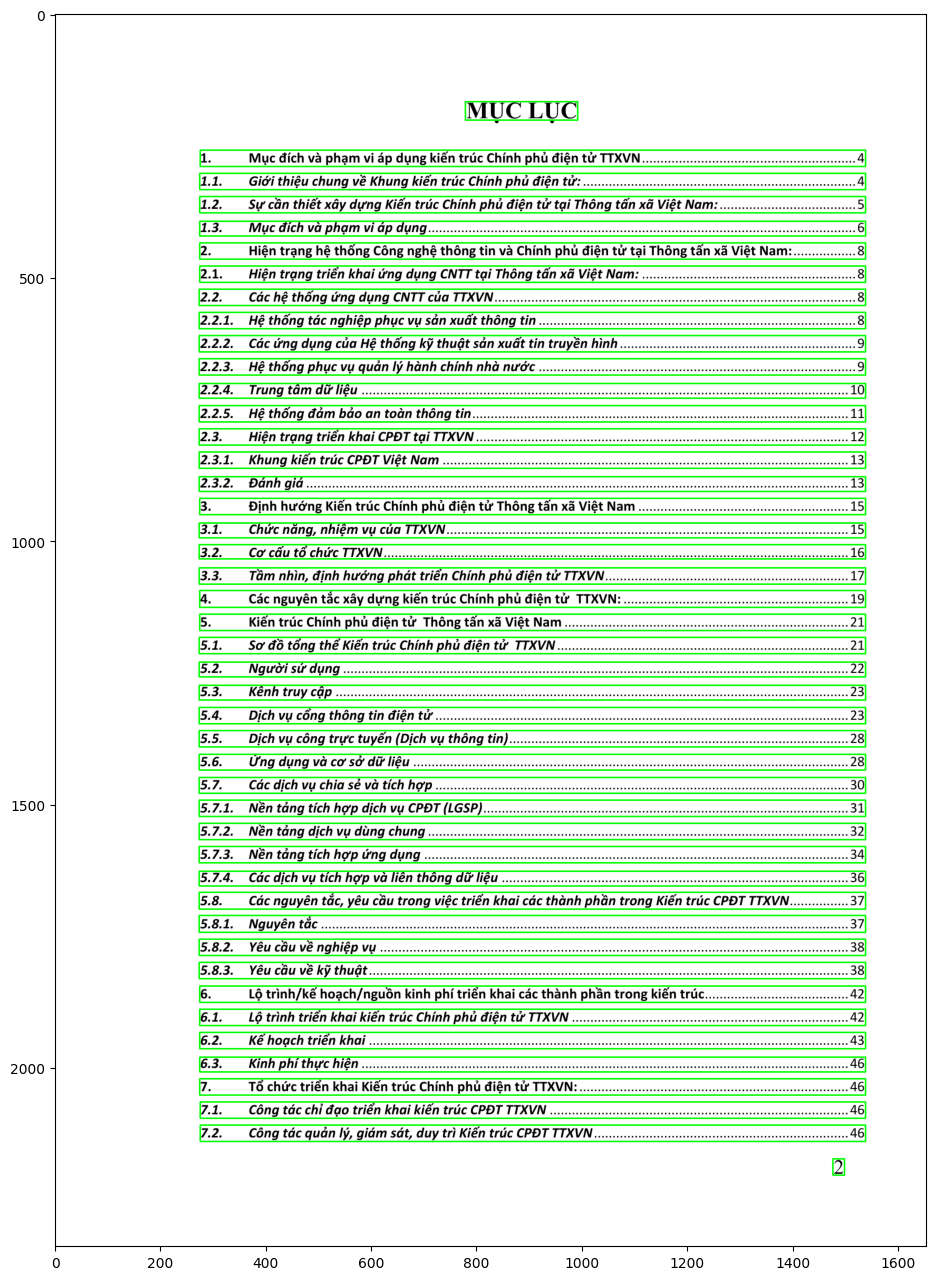

In [327]:
image_edit = cv2.imread(link_mucluc)

lines_rects = detect_line_word(image_edit)

for line in lines_rects:
    # Vẽ hình chữ nhật lớn xung quanh tất cả các hình chữ nhật con
    cv2.rectangle(image_edit, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 2)
    
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_edit)

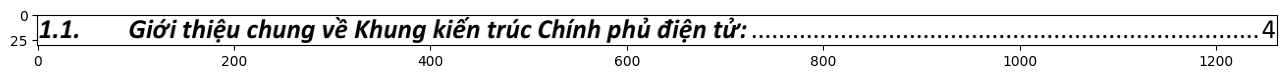

In [328]:
import random

image_crop = crop_box(image_1, lines_rects[random.randint(1, len(lines_rects))])
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_crop)

In [329]:
# def group_boxes(boxes, max_distance):
#     """
#     Nhóm các hộp ký tự gần nhau thành một nhóm.

#     Args:
#         boxes (list): Danh sách các hộp ký tự, mỗi hộp ký tự được biểu diễn bằng tọa độ (x, y, w, h).
#         max_distance (int): Khoảng cách tối đa để xem xét hai hộp ký tự là gần nhau.

#     Returns:
#         list: Danh sách các nhóm hộp ký tự, mỗi nhóm là một danh sách các hộp ký tự.
#     """
#     groups = []
#     boxes.sort(key=lambda box: box[0])  # Sắp xếp theo tọa độ x

#     current_group = [boxes[0]]

#     for box in boxes[1:]:
#         last_box = current_group[-1]
#         distance = box[0] - (last_box[0] + last_box[2])  # Khoảng cách giữa hai hộp ký tự

#         if distance <= max_distance:
#             current_group.append(box)
#         else:
#             groups.append(current_group)
#             current_group = [box]

#     if current_group:
#         groups.append(current_group)

#     # Tạo hình chữ nhật lớn nhất chứa các box gần nhau
#     lines_rects = []
#     line_margin = 10  # Khoảng cách giữa hình chữ nhật và các box
#     for line in groups:
#         x_min = min(rect[0] for rect in line) - line_margin
#         y_min = min(rect[1] for rect in line) - line_margin
#         x_max = max(rect[2] for rect in line) + line_margin
#         y_max = max(rect[3] for rect in line) + line_margin
#         lines_rects.append((x_min, y_min, x_max, y_max))

#     return lines_rects
# grouped_boxes = group_boxes([cv2.boundingRect(word) for word in detect_words], max_distance=20)

In [330]:
from sklearn.cluster import DBSCAN


def group_boxes(boxes):
    boxes.sort(key=lambda box: box[0])
    # Convert the data to numpy array
    data_np = np.array(boxes)
    # Define the DBSCAN parameters
    epsilon = 50  # Distance threshold
    min_samples = 2  # Minimum number of samples in a cluster

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

    # Fit the model to the data
    dbscan.fit(data_np)

    # Get the labels assigned to each point
    labels = dbscan.labels_

    # Get the unique labels (clusters)
    unique_labels = np.unique(labels)

    cluster_boxes = {}
    
    # Calculate bounding boxes for each cluster
    for label in unique_labels:
        # if label == -1:
        #     print("Noise points:")
        if label != -1:
            # print("Cluster", label, ":")
            cluster_points = data_np[labels == label]
            min_x = np.min(cluster_points[:, 0])
            max_x = np.max(cluster_points[:, 2])
            min_y = np.min(cluster_points[:, 1])
            max_y = np.max(cluster_points[:, 3])
            cluster_boxes[label] = (min_x, min_y, max_x, max_y)

    return cluster_boxes

In [331]:
detect_words = detect_text_area(image_crop)
# print(detect_words)

In [332]:
import cv2

boxes = []
for word in detect_words:
    rect = cv2.boundingRect(word)
    x, y, w, h = rect
    box = (x, y, x + w, y + h)
    boxes.append(box)
boxes.sort(key=lambda box: box[0])
print(boxes)

[(2, 6, 13, 24), (2, 6, 13, 24), (2, 6, 14, 24), (2, 6, 14, 24), (2, 6, 14, 24), (3, 6, 13, 24), (3, 6, 13, 24), (3, 7, 13, 24), (3, 7, 13, 24), (3, 7, 13, 24), (3, 7, 13, 24), (23, 6, 35, 24), (24, 6, 35, 24), (24, 6, 35, 24), (24, 6, 35, 24), (24, 6, 35, 24), (24, 6, 35, 24), (24, 6, 35, 24), (24, 7, 34, 24), (24, 7, 35, 24), (24, 7, 35, 24), (94, 6, 111, 24), (94, 6, 111, 24), (94, 6, 111, 24), (94, 6, 111, 25), (94, 6, 111, 25), (94, 6, 111, 25), (94, 6, 111, 25), (94, 6, 111, 25), (95, 6, 111, 24), (95, 6, 111, 24), (95, 6, 111, 24), (95, 6, 111, 24), (95, 7, 110, 24), (95, 7, 110, 24), (95, 7, 111, 24), (95, 7, 111, 24), (118, 5, 136, 25), (118, 5, 136, 25), (118, 5, 136, 25), (118, 5, 136, 25), (118, 9, 136, 24), (118, 9, 136, 24), (118, 9, 136, 24), (118, 9, 136, 24), (118, 9, 136, 24), (118, 9, 136, 25), (118, 10, 136, 24), (119, 10, 135, 24), (119, 10, 135, 24), (119, 10, 135, 24), (119, 10, 136, 24), (119, 10, 136, 24), (149, 7, 158, 25), (149, 7, 158, 25), (149, 8, 158, 25)

In [333]:
avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)
line_margin = int((avg_line_spacing / 8))
list_box = group_boxes(boxes)

In [334]:
list_box

{0: (2, 6, 35, 24), 1: (94, 2, 717, 29), 2: (1248, 6, 1261, 25)}

(2, 6, 35, 24)
(94, 2, 717, 29)
(1248, 6, 1261, 25)


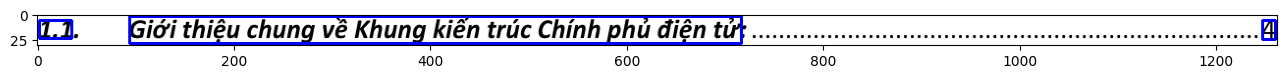

In [335]:
image_crop_cp_0 = image_crop.copy()
for label, box in list_box.items():
    print(box)
    x_min, y_min, x_max, y_max = box
    # Calculate width and height from min and max coordinates
    w = x_max - x_min
    h = y_max - y_min
    # Draw rectangle
    cv2.rectangle(image_crop_cp_0, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_crop_cp_0)

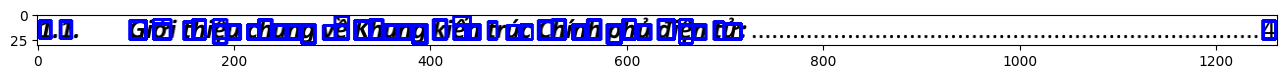

In [336]:
image_crop_cp = image_crop.copy()
for detect_word in detect_words:
    x, y, w, h = cv2.boundingRect(detect_word)
    cv2.rectangle(image_crop_cp, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_crop_cp)

# cv2.imwrite("image_test.png", image_crop)

In [337]:
import cv2
import re

# gray = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(image_crop, lang="vie")
text = " ".join(text.split()).strip()

print(text)

1.1. — Giới thiệu chung về Khung kiến trúc Chính phủ điện tử:


In [338]:
image_crop = crop_box(image_1, lines_rects[1])
text = pytesseract.image_to_string(image_crop, lang="vie")
text = re.sub(r"[\n]", " ", text)

print(text)

1. Mục đích và phạm vi áp dụng kiến trúc Chính phủ điện tử TTXVN..  


In [339]:
for i in range(len(lines_rects)):
    image_crop = crop_box(image_1, lines_rects[i])
    text = pytesseract.image_to_string(image_crop, lang="vie")
    text = re.sub(r"[\n]", " ", text)
    print(text)
    



1. Mục đích và phạm vi áp dụng kiến trúc Chính phủ điện tử TTXVN..  
1.1. — Giới thiệu chung về Khung kiến trúc Chính phủ điện tử:  
1.2. — Sự cần thiết xây dựng Kiến trúc Chính phủ điện tử tại Thông tấn xã Việt Nam:. 
1.3. Mục đích và phạm vi áp dụng....  
2.  Hiện trạng hệ thống Công nghệ thông tỉn và Chính phủ điện tử tại Thông tấn xã Việt Nam:  
2.1. Hiện trạng triển khai ứng dụng CNTT tại Thông tấn xã Việt Nam: 
2.2. Các hệ thống ứng dụng CNTT của TTXVN..  
2.2.1. Hệ thống tác nghiệp phục vụ sản xuất thông tin... 
2.2.2. Các ứng dụng của Hệ thống kỹ thuật sản xuất tin truyền hình.. 
2.2.3. Hệ thống phục vụ quản lý hành chính nhà nước  
2.2.4. Trung tâm dữ liệu ..  
2.2.5. Hệ thống đảm bảo an toàn thông tin.. 
2.3. Hiện trạng triển khai CPĐT tại TTXVN....  
2.3.1. Khung kiến trúc CPĐT Việt Nam...  

3. Định hướng Kiến trúc Chính phủ điện tử Thông tấn xã Việt Nam... 
3.1. Chức năng, nhiệm vụ của TTXVN..  
3.2.  — Cơ cấu tổ chức TTXVN...  
3.3. Tầm nhìn, định hướng phát triển Chính 

In [340]:
for i in range(len(lines_rects)):
    image_crop = crop_box(image_1, lines_rects[i])
    text = pytesseract.image_to_string(image_crop, lang="vie")
    print(i, text)
    


0 
1 1. Mục đích và phạm vi áp dụng kiến trúc Chính phủ điện tử TTXVN..


2 1.1. — Giới thiệu chung về Khung kiến trúc Chính phủ điện tử:


3 1.2. — Sự cần thiết xây dựng Kiến trúc Chính phủ điện tử tại Thông tấn xã Việt Nam:.

4 1.3. Mục đích và phạm vi áp dụng....


5 2.

Hiện trạng hệ thống Công nghệ thông tỉn và Chính phủ điện tử tại Thông tấn xã Việt Nam:


6 2.1. Hiện trạng triển khai ứng dụng CNTT tại Thông tấn xã Việt Nam:

7 2.2. Các hệ thống ứng dụng CNTT của TTXVN..


8 2.2.1. Hệ thống tác nghiệp phục vụ sản xuất thông tin...

9 2.2.2. Các ứng dụng của Hệ thống kỹ thuật sản xuất tin truyền hình..

10 2.2.3. Hệ thống phục vụ quản lý hành chính nhà nước


11 2.2.4. Trung tâm dữ liệu ..


12 2.2.5. Hệ thống đảm bảo an toàn thông tin..

13 2.3. Hiện trạng triển khai CPĐT tại TTXVN....


14 2.3.1. Khung kiến trúc CPĐT Việt Nam...


15 
16 3. Định hướng Kiến trúc Chính phủ điện tử Thông tấn xã Việt Nam...

17 3.1. Chức năng, nhiệm vụ của TTXVN..


18 3.2.  — Cơ cấu tổ chức TTXVN..

In [341]:
for i in range(len(lines_rects)):
    image_crop = crop_box(image_1, lines_rects[i])
    text = pytesseract.image_to_string(image_crop, lang="vie")
    print(i, text)
    


0 
1 1. Mục đích và phạm vi áp dụng kiến trúc Chính phủ điện tử TTXVN..


2 1.1. — Giới thiệu chung về Khung kiến trúc Chính phủ điện tử:


3 1.2. — Sự cần thiết xây dựng Kiến trúc Chính phủ điện tử tại Thông tấn xã Việt Nam:.

4 1.3. Mục đích và phạm vi áp dụng....


5 2.

Hiện trạng hệ thống Công nghệ thông tỉn và Chính phủ điện tử tại Thông tấn xã Việt Nam:


6 2.1. Hiện trạng triển khai ứng dụng CNTT tại Thông tấn xã Việt Nam:

7 2.2. Các hệ thống ứng dụng CNTT của TTXVN..


8 2.2.1. Hệ thống tác nghiệp phục vụ sản xuất thông tin...

9 2.2.2. Các ứng dụng của Hệ thống kỹ thuật sản xuất tin truyền hình..

10 2.2.3. Hệ thống phục vụ quản lý hành chính nhà nước


11 2.2.4. Trung tâm dữ liệu ..


12 2.2.5. Hệ thống đảm bảo an toàn thông tin..

13 2.3. Hiện trạng triển khai CPĐT tại TTXVN....


14 2.3.1. Khung kiến trúc CPĐT Việt Nam...


15 
16 3. Định hướng Kiến trúc Chính phủ điện tử Thông tấn xã Việt Nam...

17 3.1. Chức năng, nhiệm vụ của TTXVN..


18 3.2.  — Cơ cấu tổ chức TTXVN..

In [342]:
# #!pip install easyocr
# import easyocr
# reader = easyocr.Reader(["vi"])
# reader.readtext(image_crop)

In [343]:
import math

def rectangle_distance(rect1, rect2):
    # Tính toán tọa độ các đỉnh của hình hộp chữ nhật thứ nhất
    rect1_x_min, rect1_y_min, rect1_x_max, rect1_y_max = rect1
    rect1_points = [(rect1_x_min, rect1_y_min), (rect1_x_max, rect1_y_max)]

    # Tính toán tọa độ các đỉnh của hình hộp chữ nhật thứ hai
    rect2_x_min, rect2_y_min, rect2_x_max, rect2_y_max = rect2
    rect2_points = [(rect2_x_min, rect2_y_min), (rect2_x_max, rect2_y_max)]

    # Tìm khoảng cách giữa từng cặp đỉnh của hai hình hộp chữ nhật
    min_distance = float('inf')  # Khởi tạo khoảng cách nhỏ nhất là vô cùng lớn
    for point1 in rect1_points:
        for point2 in rect2_points:
            distance = math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)
            if distance < min_distance:
                min_distance = distance

    return min_distance

# Tọa độ của các đỉnh của hai hình hộp chữ nhật
rect1 = (55, 16, 68, 33)
rect2 = (104, 15, 121, 33)

# Tính khoảng cách giữa hai hình hộp chữ nhật
distance = rectangle_distance(rect1, rect2)
print("Khoảng cách giữa hai hình hộp chữ nhật là:", distance)


Khoảng cách giữa hai hình hộp chữ nhật là: 40.24922359499622
